In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

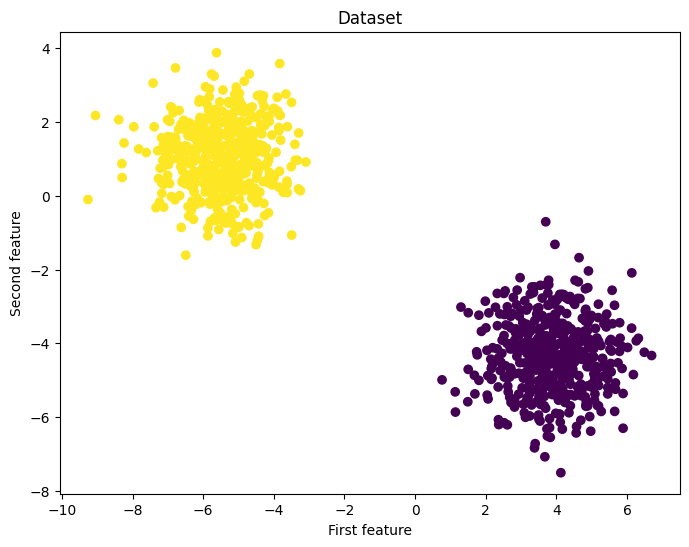

In [8]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

![title](./img/log.png "ShowMyImage")

Training

Different to linear regression, logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, gradient descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

![title](./img/log-2.png "log2")

![title](./img/log-3.png "ShowMyImage")

In [1]:
#![title](./img/log.png "ShowMyImage")

In [9]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [19]:
class LogisticRegression:

    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(round(cost,5))
            if i % 25 == 0:
                print(f"Cost after iteration {i}: {round(cost,5)}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        threshold=.5
        y_predict_labels = [1 if elem > threshold else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

Cost after iteration 0: 0.69315
Cost after iteration 25: 0.16424
Cost after iteration 50: 0.08906
Cost after iteration 75: 0.06104
Cost after iteration 100: 0.04651
Cost after iteration 125: 0.03763
Cost after iteration 150: 0.03163
Cost after iteration 175: 0.02732
Cost after iteration 200: 0.02405
Cost after iteration 225: 0.0215
Cost after iteration 250: 0.01945
Cost after iteration 275: 0.01776
Cost after iteration 300: 0.01635
Cost after iteration 325: 0.01516
Cost after iteration 350: 0.01413
Cost after iteration 375: 0.01323
Cost after iteration 400: 0.01245
Cost after iteration 425: 0.01175
Cost after iteration 450: 0.01113
Cost after iteration 475: 0.01058
Cost after iteration 500: 0.01007
Cost after iteration 525: 0.00962
Cost after iteration 550: 0.00921
Cost after iteration 575: 0.00883


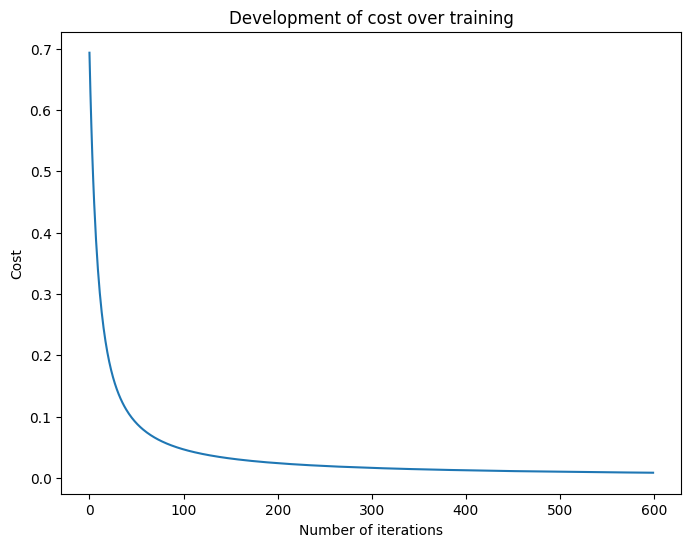

In [20]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Testing the model

In [21]:


y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")



train accuracy: 100.0%
test accuracy: 100.0%
